**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Matsuru Hoshi<br/>
Student Number: 300228879

Name: Yu-Chen Lee<br/>
Student Number: 300240688



### TO DO:
✅ Data Exploration (matsuru)\
🟥 Data Pre-Processing 5 (matsuru)\
🟥 Data Pre-Processing 6 (renny)\
🟥 Model Development & Evaluation 7 (matsuru)\
🟥 Model Development & Evaluation 8 (renny)\
🟥 Hyperparameter Optimization (both)\
🟥 Analysis of Results (both)\
🟥 Documentation & Resources (both)

## Importing Important Libaries

In [154]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [48]:
url = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv'

diabetes_df = pd.read_csv(url)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [49]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [50]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [51]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Identifiying values of ambiguous attributes
- Gender
- Hypertension
- Heart Disease
- Smoking History
- Diabetes

The following cells counts the number of recurrent values in each attribute.

In [52]:
diabetes_df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

We can expect 3 values for the `gender` attribute.

In [100]:
diabetes_df.heart_disease.value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

For `heart_disease`, it looks like we have binary values. 

In [ ]:
diabetes_df.hypertension.value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

For `hypertension`, we have binary values as well. 

In [53]:
diabetes_df.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

We have a finite (5) number of possible values for the `smoking_history`.

#### Identifying the target variable

In [54]:
diabetes_df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

From the cell above, we have identified that the `diabetes` column/attribute is *binary*, and thus can be used in a binary classification task. From this, we can also conclude that it must represent whether the patient has diabetes (1 or 0 ≈ yes or no).

Thus, we can safely say that `diabetes` will be our target variable.

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

In [55]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Gender

We will look at the gender distribution of the dataset.

<Axes: >

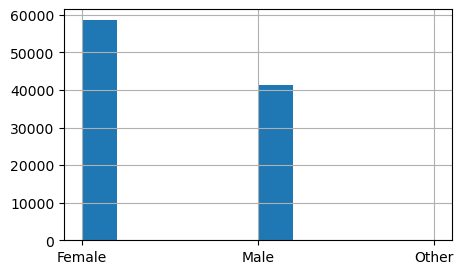

In [56]:
diabetes_df.gender.hist(figsize=(5,3))

It appears there are slightly more women than men. "Other" is not large enough to appear on the graph.



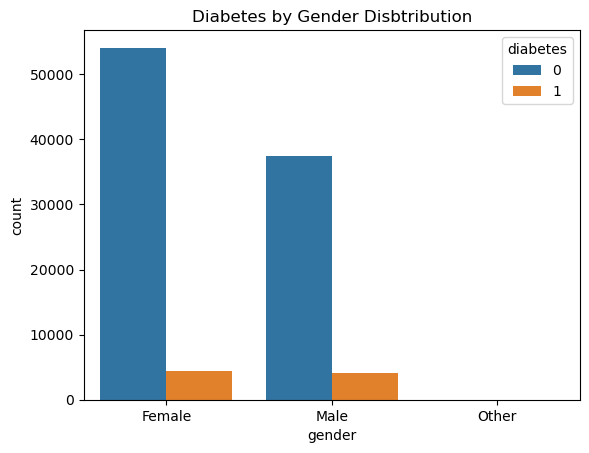

In [98]:
sns.countplot(diabetes_df, x="gender", hue="diabetes")
plt.title('Diabetes by Gender Disbtribution')
plt.show()

It is not entirely clear if this is significant, but it appears the diabetes-rate among men is higher than women.

#### Age

We will plit a boxplot for the age attribute.

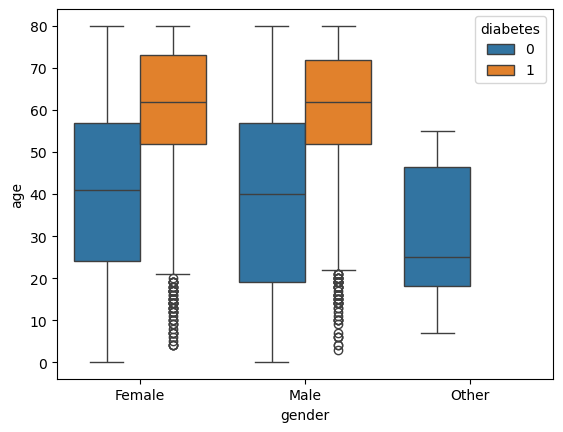

In [136]:
sns.boxplot(diabetes_df, x="gender", y="age", hue="diabetes")
plt.show()

We can see from this boxplot that most diabetetic patients are closer to the 50-70 age mark. That said, there are multiple outliers that fall under the lower wisker of the diabetes-positive boxplot.

Furthermore, there appear to be no outliers in the upper wisker.

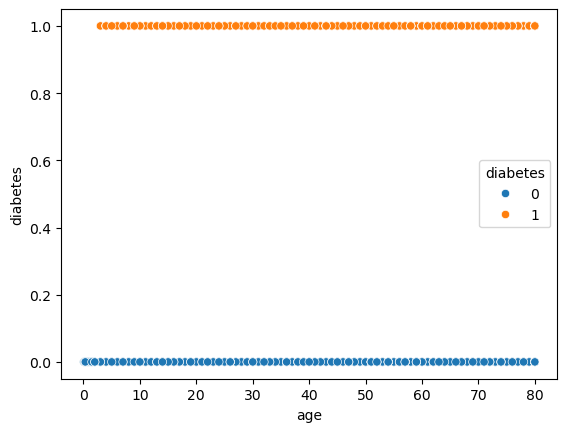

In [133]:
sns.scatterplot(diabetes_df, x="age", y="diabetes", hue="diabetes")
plt.show()

It seems the scatter plot is not relevant. In fact, this makes sense I would guess. There are many people of all ages without diabetes. There is no strong relationship between age and diabetes.

#### Smoking History

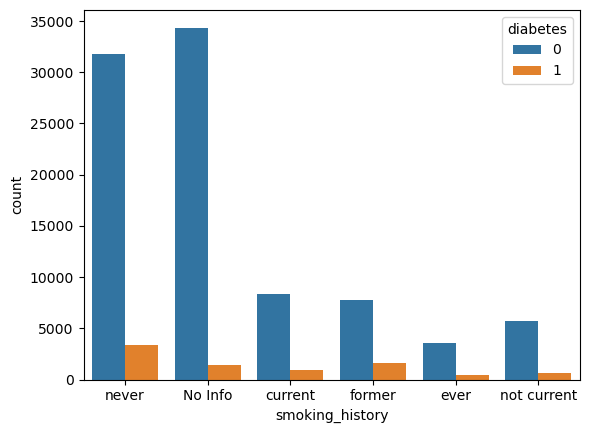

In [120]:
sns.countplot(diabetes_df, x="smoking_history", hue="diabetes")
plt.show()

It appears that having vs not having smoking history doesn't have a very strong correlation to having diabetes.

#### Body Mass Index (BMI)

Since this is a continuous value, we will use a scatter plot against the binary diabetes.

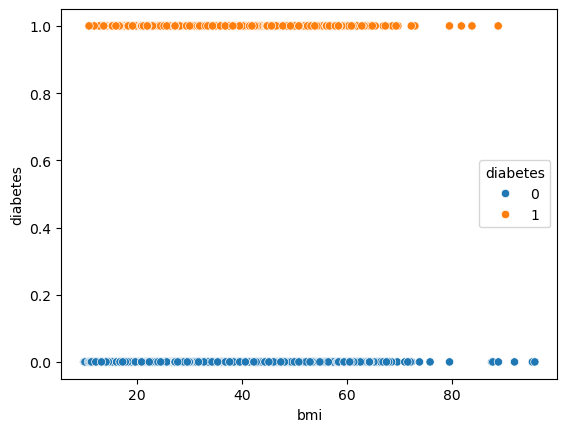

In [119]:
sns.scatterplot(diabetes_df, x="bmi", y="diabetes", hue="diabetes")
plt.show()

There appears to be no correlation.

###$ HbA1c Level

We will again plot a scatter plot to see any correlation between the continuous and binary value.

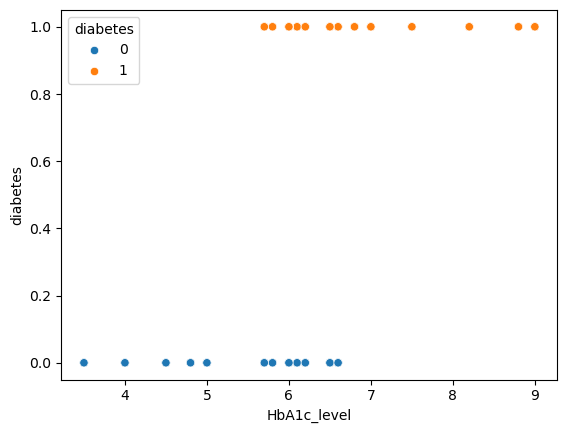

In [130]:
sns.scatterplot(diabetes_df, x="HbA1c_level", y="diabetes", hue="diabetes")
plt.show()

It seems we've encountered a useful corelation at last. It appears that HbA1c level has a logistic curve relation with diabetes.

This makes sense since Hb1Ac is a type of blood-glucose test that shows your average blood-glucose levels in the past 2-3 months before the exam.

Source: [Medline Plus](https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/)

#### Blood Glucose Level

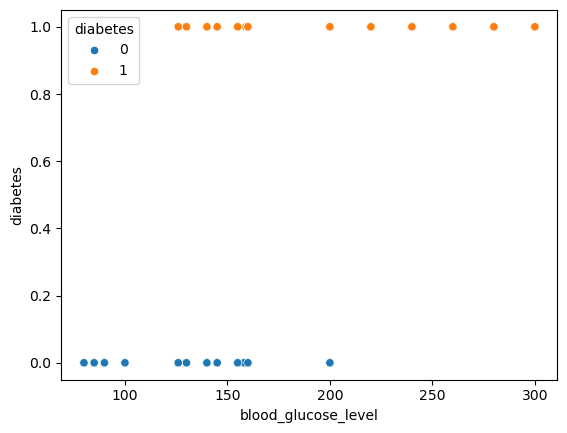

In [131]:
sns.scatterplot(diabetes_df, x="blood_glucose_level", y="diabetes", hue="diabetes")
plt.show()

Likewise, while slightly less, blood-glucose level also has a similar logistic relationship to diabetes. Indeed, this a well-known factor of diabetes.

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

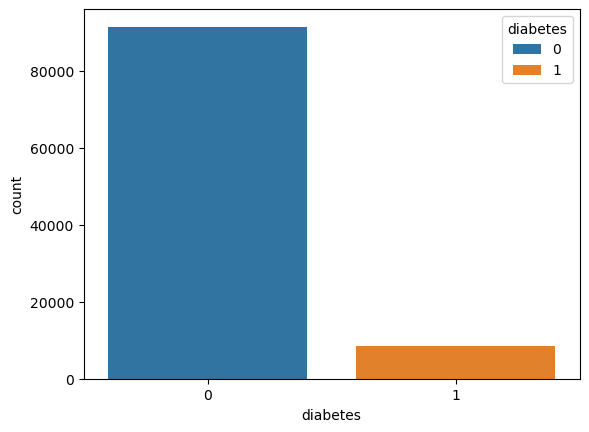

In [152]:
sns.countplot(diabetes_df, x="diabetes", hue="diabetes")
plt.show()

There is a clear imbalance towards non diabetic (0). I suppose this is good... ? 

This could affect the model training. We will see.

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [155]:
diabetes_train, diabetes_test = train_test_split(diabetes_df, test_size=0.2, random_state=42)

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

In [60]:
# Code cell

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [61]:
# Code cell

## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [62]:
# Code cell

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [63]:
# Code cell

## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [64]:
# Code cell

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

In [65]:
# Code cell

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources

Environment Setup
- https://anaconda.org/anaconda/seaborn
